In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

##1. Loading Dataset and Preprocessing the Data

### Loading Dataset

In [ ]:
titanic_data = pd.read_csv("/content/titanicdata.csv")

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age
0,0,3,2,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,2,35.0


In [ ]:
titanic_data.shape

(891, 4)

In [ ]:
titanic_data['Survived'].unique()

array([0, 1])

In [ ]:
titanic_data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic_data['Sex'].unique()

array([2, 1])

In [ ]:
titanic_data['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:
titanic_data.describe()

,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.647587,29.699118
std,0.486592,0.836071,0.477990,13.002015
min,0.000000,1.000000,1.000000,0.420000
25%,0.000000,2.000000,1.000000,22.000000
50%,0.000000,3.000000,2.000000,29.699118
75%,1.000000,3.000000,2.000000,35.000000
max,1.000000,3.000000,2.000000,80.000000


### Splitting Data

In [ ]:
training_data, test_and_validation_data = train_test_split(titanic_data, test_size=0.4, random_state=42)

In [ ]:
validation_data, test_data = train_test_split(test_and_validation_data, test_size=0.5, random_state=42)

In [ ]:
training_data.shape

(534, 4)

In [ ]:
test_and_validation_data.shape

(357, 4)

In [ ]:
validation_data.shape

(178, 4)

In [ ]:
test_data.shape

(179, 4)

### Scaling Data

In [ ]:
scaler = MinMaxScaler()

In [ ]:
training_data_scaled = pd.DataFrame(scaler.fit_transform(training_data), columns=training_data.columns)

In [ ]:
validation_data_scaled = pd.DataFrame(scaler.transform(validation_data), columns=validation_data.columns)

In [ ]:
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

### Splitting Features and Labels

In [ ]:
X_training_data = training_data_scaled.drop('Survived', axis=1)
y_training_data = training_data_scaled['Survived']
X_validation_data = validation_data_scaled.drop('Survived', axis=1)
y_validation_data = validation_data_scaled['Survived']
X_test_data = test_data_scaled.drop('Survived', axis=1)
y_test_data = test_data_scaled['Survived']

In [ ]:
X_training_data.head()

,Pclass,Sex,Age
0,0.5,1.0,0.773813
1,1.0,1.0,0.095250
2,1.0,1.0,0.396833
3,1.0,0.0,0.246042
4,0.5,0.0,0.346569


In [ ]:
X_training_data.shape

(534, 3)

In [ ]:
y_training_data.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Survived, dtype: float64

In [ ]:
y_training_data.shape

(534,)

### Adding Bias to Dataframes

In [ ]:
features_train_biased = np.hstack([np.ones((X_training_data.shape[0], 1)), X_training_data.values])
features_val_biased = np.hstack([np.ones((X_validation_data.shape[0], 1)), X_validation_data.values])
features_test_biased = np.hstack([np.ones((X_test_data.shape[0], 1)), X_test_data.values])

In [ ]:
features_train_biased

array([[1.        , 0.5       , 1.        , 0.77381252],
       [1.        , 1.        , 1.        , 0.09525006],
       [1.        , 1.        , 1.        , 0.39683338],
       ...,
       [1.        , 1.        , 1.        , 0.50992712],
       [1.        , 0.        , 0.        , 0.17064589],
       [1.        , 0.        , 1.        , 0.25860769]])

## 2. Implementing the Logistic Regression Model

### Weight Generation

In [ ]:
def weight_generation(features):
  return np.random.rand(features.shape[1])

### Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Implementing Cost Function

In [ ]:
def logistic_cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * (np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)))
    return cost

### Implementing Gradient Descent Algorithm

In [ ]:
def gradient_descent(X_training_data, y_training_data, X_validation_data, y_validation_data, weights, alpha, num_iterations):
    training_cost_history = []
    validation_cost_history = []

    for i in range(num_iterations):
        predictions_train = sigmoid(np.dot(X_training_data, weights))
        error_train = predictions_train - y_training_data
        gradient = np.dot(X_training_data.T, error_train) / len(y_training_data)
        weights -= alpha * gradient
        train_cost = logistic_cost_function(X_training_data, y_training_data, weights)
        val_cost = logistic_cost_function(X_validation_data, y_validation_data, weights)

        training_cost_history.append(train_cost)
        validation_cost_history.append(val_cost)

    return weights, training_cost_history, validation_cost_history

##3. Training Model

### Model Training

In [ ]:
weight = weight_generation(features_train_biased)

learning_rate = 0.1
iterations = 100

final_weights_biased, training_losses_biased, validation_losses_biased = gradient_descent(
    features_train_biased, y_training_data, features_val_biased, y_validation_data, weight, learning_rate, iterations)

### Loss Visualization

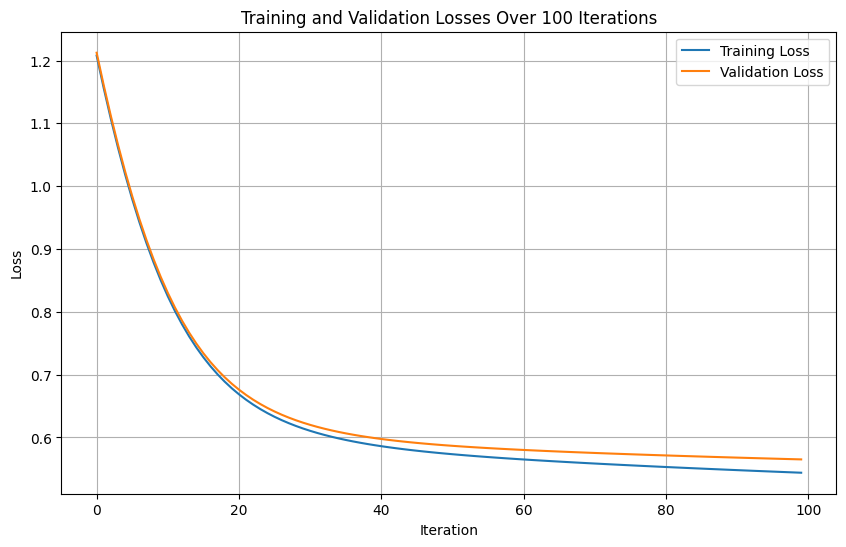

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(training_losses_biased, label='Training Loss')
plt.plot(validation_losses_biased, label='Validation Loss')
plt.title('Training and Validation Losses Over 100 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## 4. Varying step size for best parameter

As an observation, best a is between 0.9 and 1. Sşmşlarly iterations can change because of the randomness of the weights.


In [ ]:
def hyperparameter_decider(X_training_data, y_training_data, X_validation_data, y_validation_data, step_sizes, num_iterations):
    best_loss = float('inf')
    best_params = {}
    losses = {}

    for alpha in step_sizes:
        for iterations in num_iterations:
            weights = weight_generation(X_training_data)
            _, _, validation_losses = gradient_descent(X_training_data, y_training_data, X_validation_data, y_validation_data, weights, alpha, iterations)
            final_val_loss = validation_losses[-1]
            losses[(alpha, iterations)] = validation_losses

            if final_val_loss < best_loss:
                best_loss = final_val_loss
                best_params = {'alpha': alpha, 'iterations': iterations, 'weights': weights}

    return best_params, losses

In [ ]:
step_sizes = [0.01, 0.05, 0.07, 0.1, 0.3 , 0.5, 0.7, 0.9, 1]
num_iterations = [50, 100, 150, 200, 250]

best_params, all_losses = hyperparameter_decider(features_train_biased, y_training_data, features_val_biased, y_validation_data, step_sizes, num_iterations)

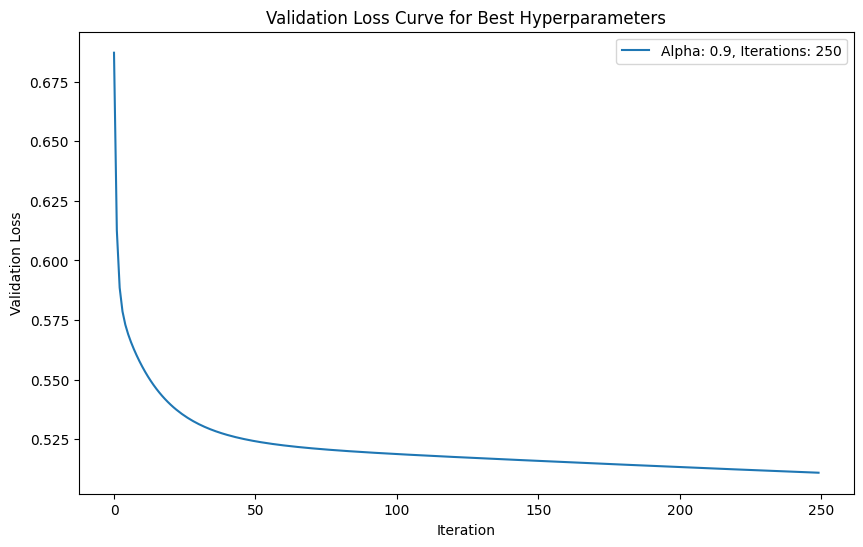

In [ ]:
plt.figure(figsize=(10, 6))
for params, losses in all_losses.items():
    if params == (best_params['alpha'], best_params['iterations']):
        plt.plot(losses, label=f"Alpha: {params[0]}, Iterations: {params[1]}")
plt.title('Validation Loss Curve for Best Hyperparameters')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
print("The best learning rate is ", best_params['alpha'])

The best learning rate is  0.9


In [ ]:
print("The best number of iteration is ", best_params['iterations'])

The best number of iteration is  250


## 5. Combining validation and training data

In [ ]:
combined_features = np.vstack([features_train_biased, features_val_biased])
combined_targets = np.concatenate([y_training_data, y_validation_data])

final_weights, _, _ = gradient_descent(combined_features, combined_targets, combined_features, combined_targets, np.random.rand(features_train_biased.shape[1]), best_params['alpha'], best_params['iterations'])


## 6. Evaluating model

In [ ]:
def evaluate_model(X_test_data, y_test_data, weights):
    predictions = sigmoid(np.dot(X_test_data, weights)) >= 0.5
    accuracy = np.mean(predictions == y_test_data)
    return accuracy

In [ ]:
test_accuracy = evaluate_model(features_test_biased, y_test_data, final_weights)
print(f"The accuracy of the final model on the test data is {test_accuracy * 100:.2f}%")


The accuracy of the final model on the test data is 79.33%
